# Kaggle Learn - Data Visualization

Working through lessons from https://www.kaggle.com/learn/data-visualisation

## Level 1, Part 7 - Faceting with Seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('default')

### Faceting with Seaborn

 Faceting is a multivariate plotting method that works by "gridding out" the data

**sns.FacetGrid()**
* Creates a grid object mapping categorical variables to subplots.
* The instance method **.map** then takes a plot method and data to apply by category to each plot
* Limited to categorical variables with low numeracy (plots become hard to read around 5 by 5)
<br>

**sns.pairplot()**
* Method for faceting variable distributions 
* By default returns scatter plots off diagonal and histograms on the diagonal
* Useful for visual examination of feature distribution and correlation
* Good for exploring most kinds of data

In [3]:
# Data and pre-processing for examples
pd.set_option('max_columns', None)
df = pd.read_csv("data/FifaCompleteDataset.csv", index_col=0)

import re
footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].
                                    replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                Position=footballers['Preferred Positions'].str.split().str[0])

footballers.head(5)

/home/paul/Software/anaconda2/envs/ds36_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


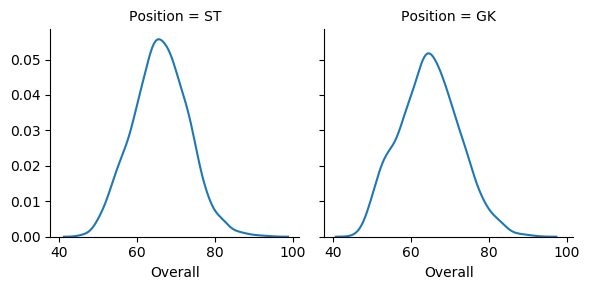

In [25]:
# FacetGrid - 1D
  # In this example, selecting rows where position is ST or GK and 
  # creating a FacetGrid object with one plot per position is selection

g = sns.FacetGrid(footballers[footballers['Position'].isin(['ST', 'GK'])],
                  col="Position")

  # Use FacetGrid.map method to plot "Overall" column for each plot  
    # pass plot method to use to .map method
g.map(sns.kdeplot, "Overall")

plt.show()

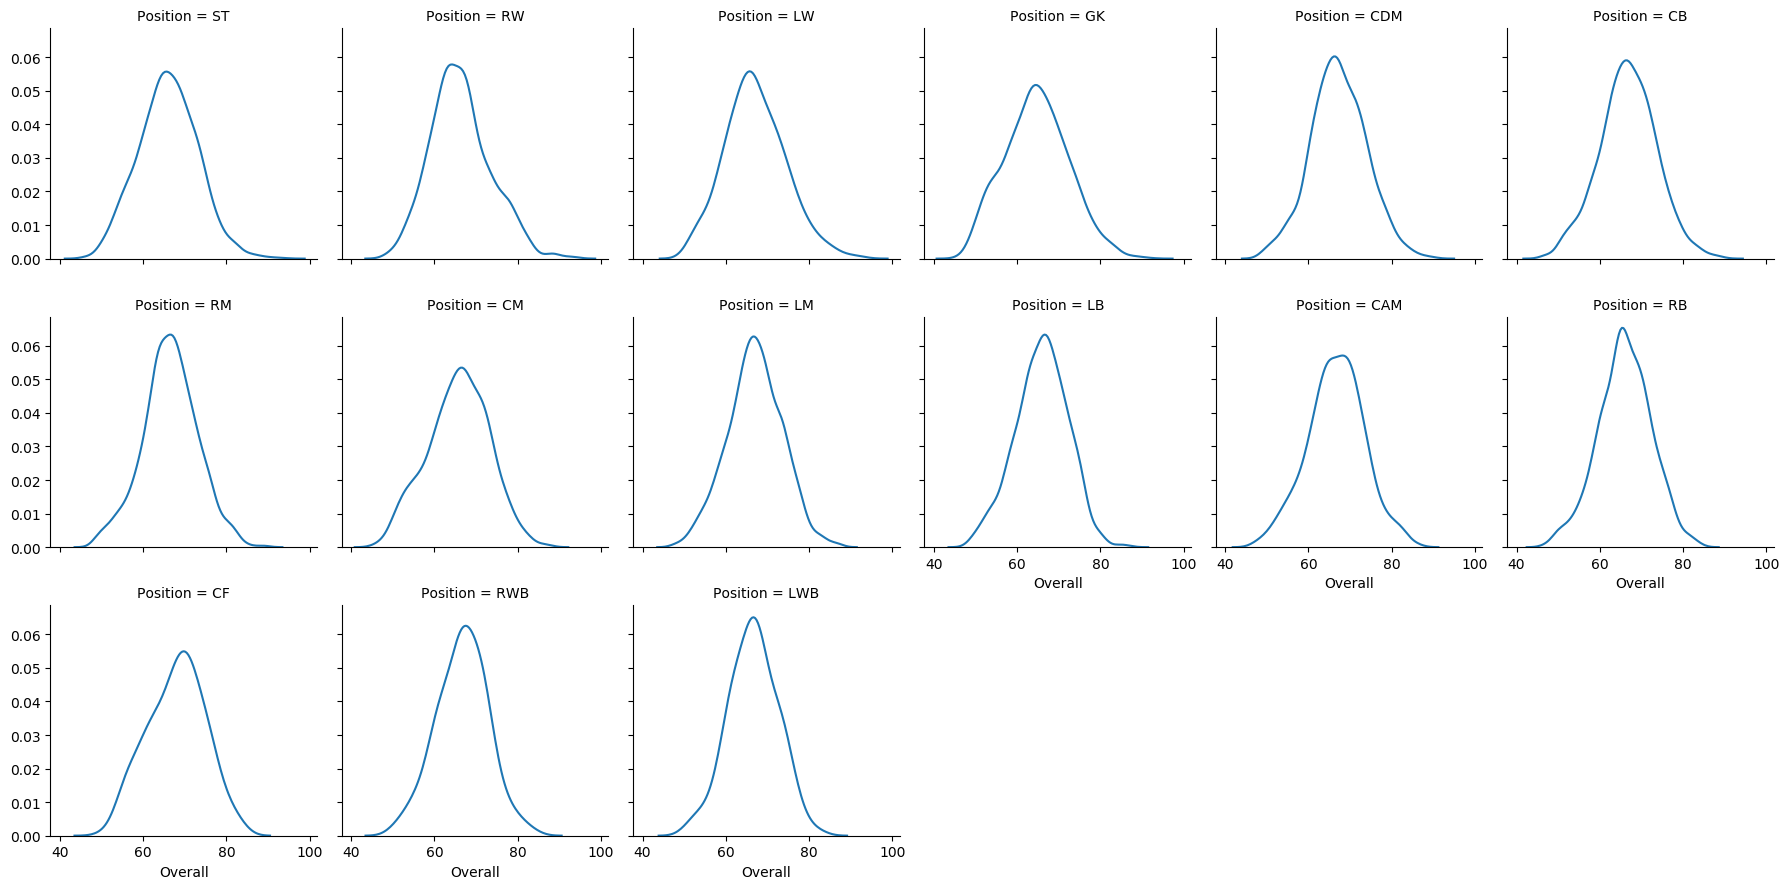

In [28]:
# FacetGrid - wrap columns
g = sns.FacetGrid(footballers, col="Position", col_wrap=6)
g.map(sns.kdeplot, "Overall")
plt.show()

/home/paul/Software/anaconda2/envs/ds36_env/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


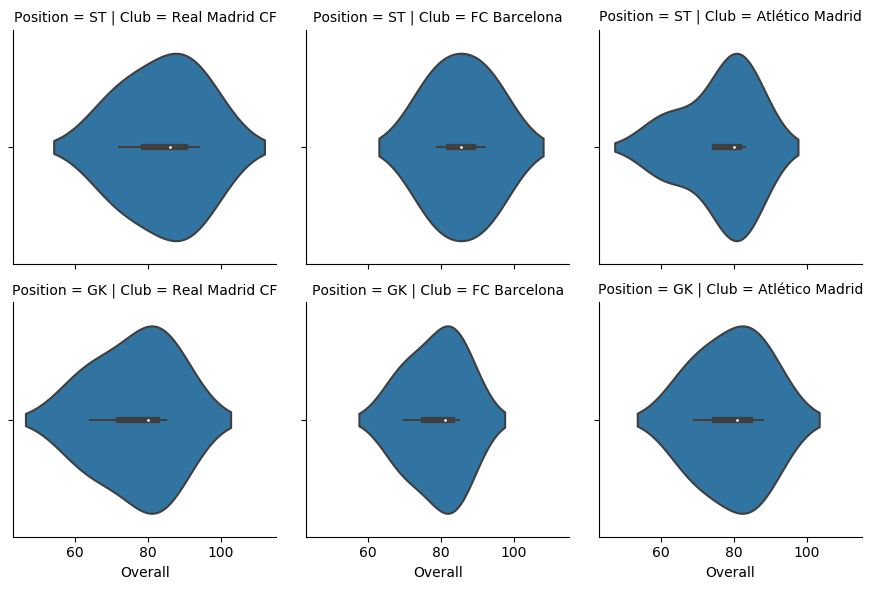

In [33]:
# Facetgrid - 2D - default order
df = footballers[(footballers['Position'].isin(['ST', 'GK'])) & 
                 (footballers['Club'].isin(['Real Madrid CF', 'FC Barcelona',
                                            'Atlético Madrid']))]
                                         
g = sns.FacetGrid(df, row="Position", col="Club")
g.map(sns.violinplot, "Overall")
plt.show()

/home/paul/Software/anaconda2/envs/ds36_env/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


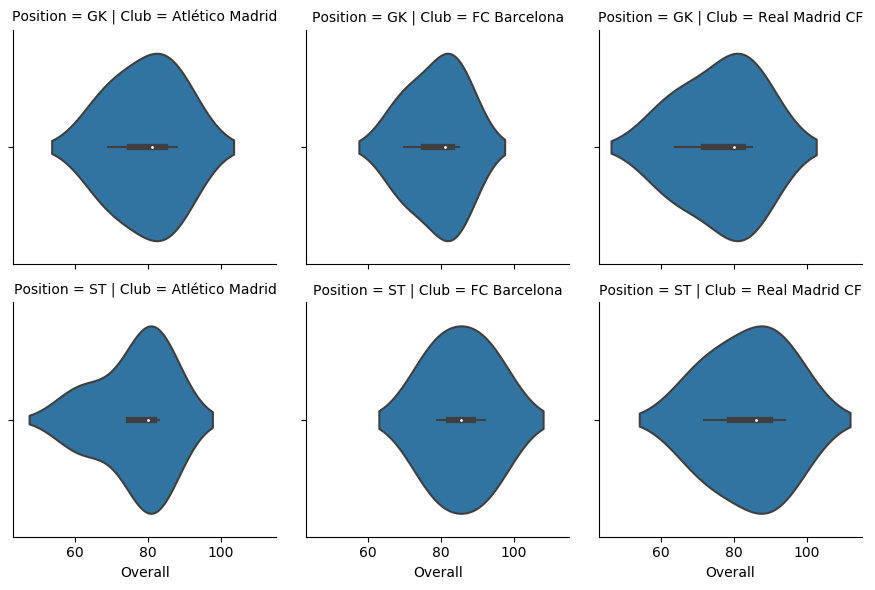

In [34]:
# Facetgrid - 2D - custom order
df = footballers[(footballers['Position'].isin(['ST', 'GK'])) & 
                 (footballers['Club'].isin(['Real Madrid CF', 'FC Barcelona',
                                            'Atlético Madrid']))]
                                         
g = sns.FacetGrid(df, row="Position", col="Club", 
             row_order=['GK', 'ST'],
             col_order=['Atlético Madrid', 'FC Barcelona', 'Real Madrid CF'])

g.map(sns.violinplot, "Overall")
plt.show()





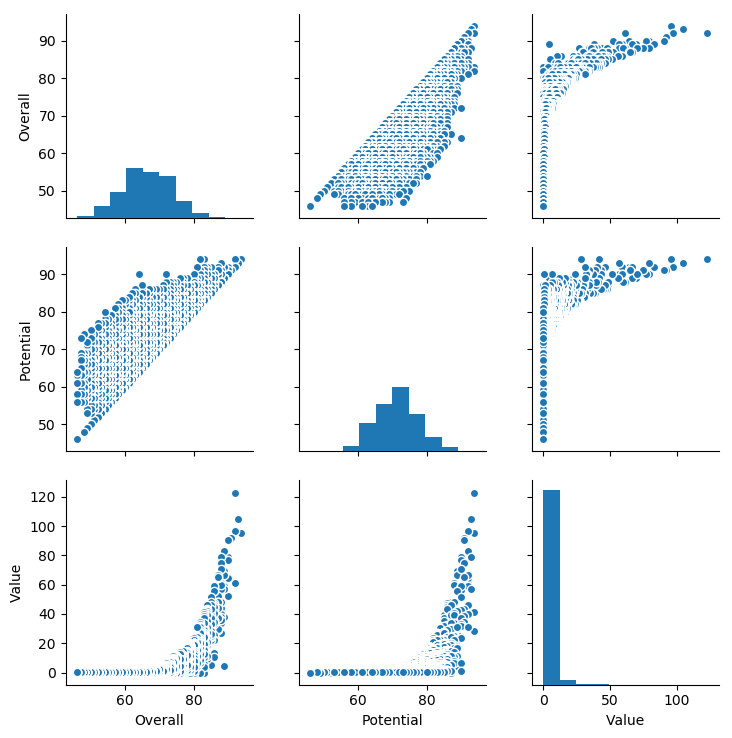

In [37]:
# Pairplot
sns.pairplot(footballers[['Overall', 'Potential', 'Value']])
plt.show()

#### Exercises

In [40]:
pd.set_option('max_columns', None)
pokemon = pd.read_csv("data/pokemon.csv")
pokemon.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0


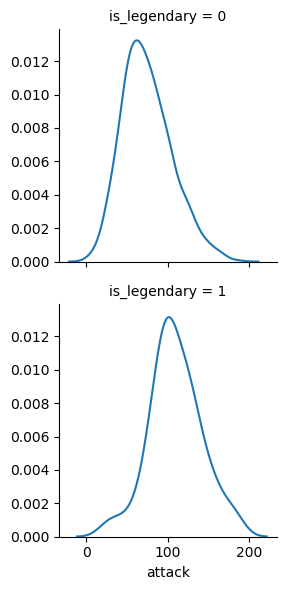

In [47]:
grid = sns.FacetGrid(pokemon, row='is_legendary')

  # Use FacetGrid.map method to plot "Overall" column for each plot  
    # pass plot method to use to .map method
grid.map(sns.kdeplot, 'attack')

plt.show()

<Figure size 400x1200 with 0 Axes>

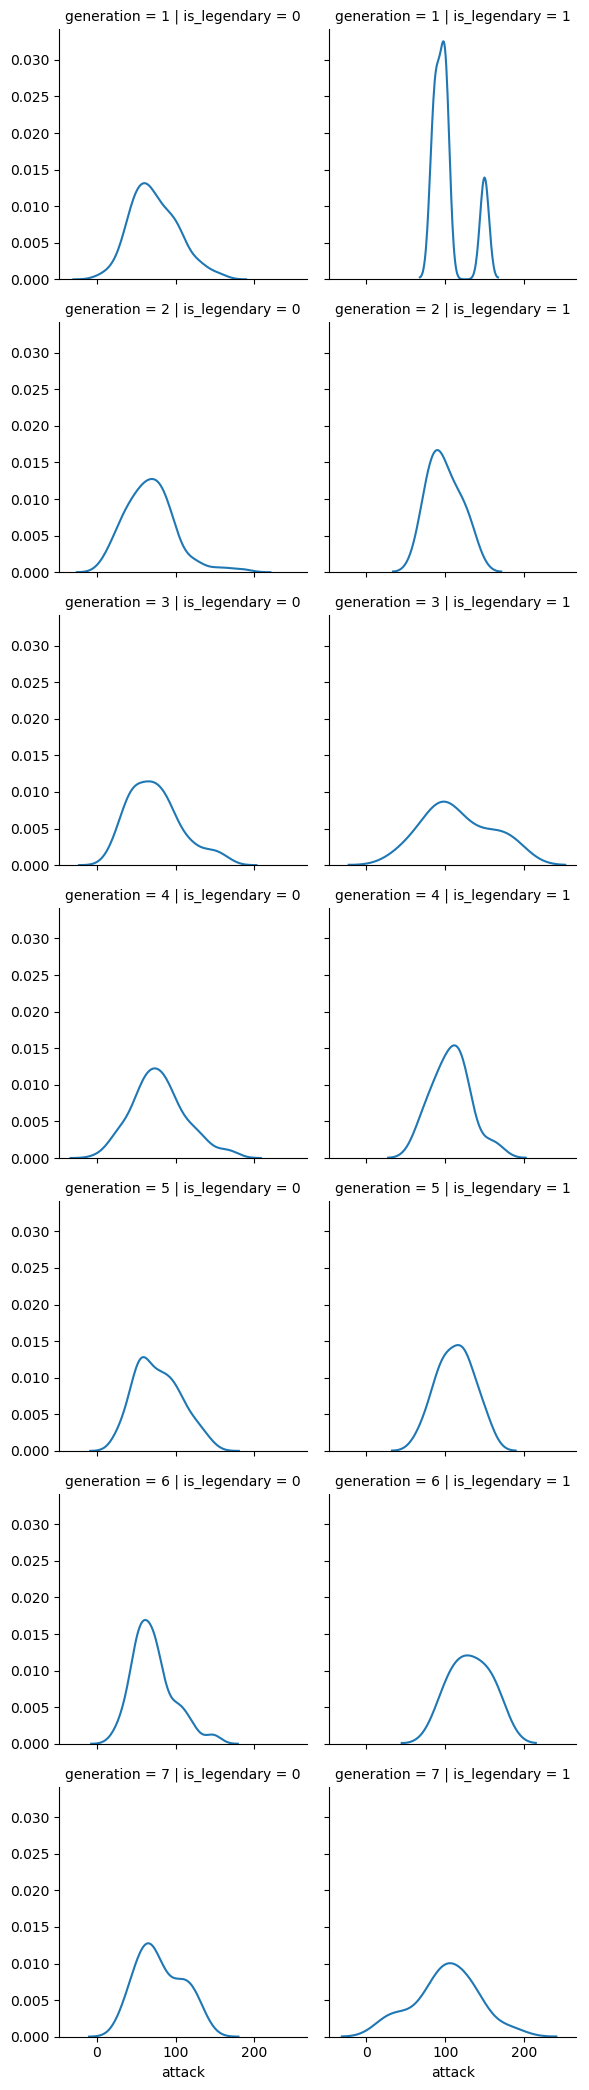

In [70]:
fig = plt.figure(figsize=(4,12))
grid = sns.FacetGrid(pokemon, row='generation', col='is_legendary')
grid.map(sns.kdeplot, 'attack')
plt.show()

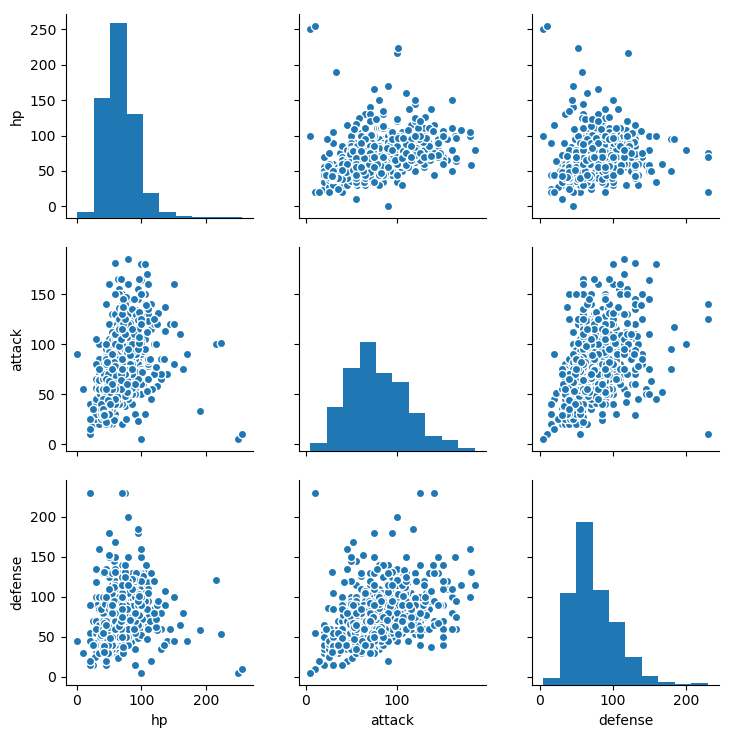

In [73]:
sns.pairplot(pokemon[['hp', 'attack', 'defense']])
plt.show()
